In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

In [64]:
std = '1275'

initialisation_folder = (r'C:\Users\amdm_\OneDrive\Documents\GitHub\viscosity_liquid_transfer_Pablo\Opentrons_experiments\Random_initialisation_data_ver3')

df_cal = pd.read_csv(initialisation_folder+r'/Viscosity_std_'+std+'.csv').drop(0)

df_cal


,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,touch_tip_aspirate,touch_tip_dispense,density,time,mi,mf,m,%error,Transfer_Observation,Comment
1,Viscosity_std_1275,p1000,1000.0,22.0,11.00,0.0,5.0,5.0,0.0,True,False,0.8736,153.371111,21.8357,22.5978,0.7621,-12.763278,incomplete aspiration,NaN
2,Viscosity_std_1275,p1000,500.0,22.0,11.00,0.0,5.0,5.0,0.0,True,False,0.8736,84.233797,22.5978,22.9302,0.3324,-23.901099,incomplete aspiration,NaN
3,Viscosity_std_1275,p1000,100.0,22.0,11.00,0.0,5.0,5.0,0.0,True,False,0.8736,29.618288,22.9302,22.9826,0.0524,-40.018315,incomplete aspiration,NaN
4,Viscosity_std_1275,p1000,1000.0,15.4,11.00,0.0,5.0,5.0,0.0,True,False,0.8736,173.851219,22.9826,23.7682,0.7856,-10.073260,incomplete aspiration,NaN
5,Viscosity_std_1275,p1000,500.0,15.4,11.00,0.0,5.0,5.0,0.0,True,False,0.8736,95.076198,23.7682,24.1151,0.3469,-20.581502,incomplete aspiration,NaN
6,Viscosity_std_1275,p1000,100.0,15.4,11.00,0.0,5.0,5.0,0.0,True,False,0.8736,32.180521,24.1151,24.1676,0.0525,-39.903846,incomplete aspiration,NaN
7,Viscosity_std_1275,p1000,1000.0,19.8,13.75,0.0,5.0,5.0,0.0,True,False,0.8736,139.799583,24.1676,24.9241,0.7565,-13.404304,incomplete aspiration,NaN
8,Viscosity_std_1275,p1000,500.0,19.8,13.75,0.0,5.0,5.0,0.0,True,False,0.8736,77.903420,24.9241,25.2517,0.3276,-25.000000,incomplete aspiration,NaN
9,Viscosity_std_1275,p1000,100.0,19.8,13.75,0.0,5.0,5.0,0.0,True,False,0.8736,28.472146,25.2517,25.2929,0.0412,-52.838828,incomplete aspiration,NaN
10,Viscosity_std_1275,p1000,1000.0,12.1,13.20,0.0,5.0,5.0,0.0,True,False,0.8736,179.125066,25.2929,26.0890,0.7961,-8.871337,incomplete aspiration,NaN


In [65]:
ARs = df_cal['aspiration_rate'].unique()
ARs

array([22. , 15.4, 19.8, 12.1])

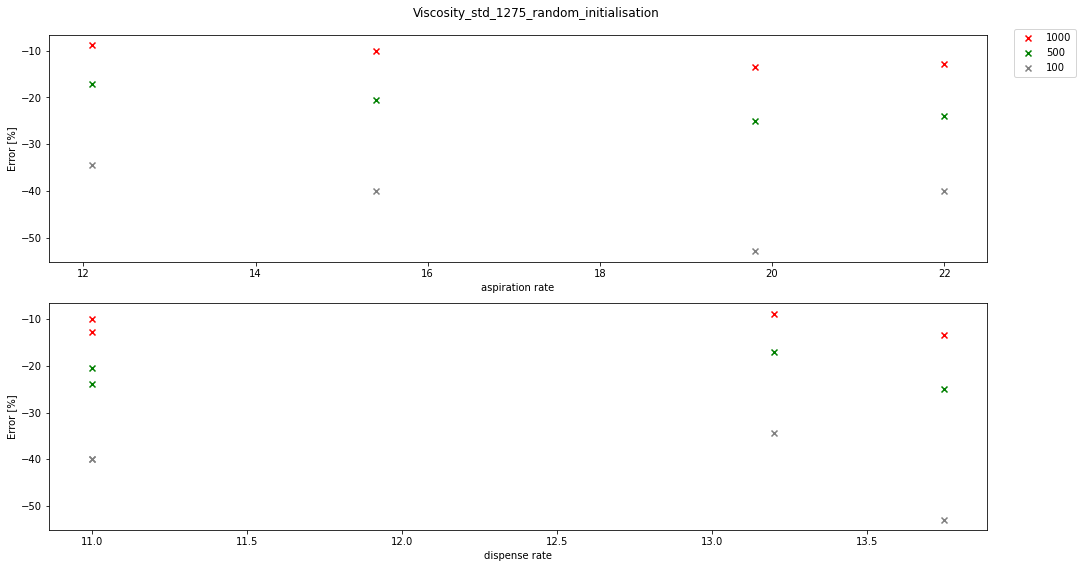

In [66]:

fig,axs = plt.subplots(2,1)


df_cal_1000 = df_cal.where(df_cal.volume==1000).dropna(how='all')
df_cal_500 = df_cal.where(df_cal.volume==500).dropna(how='all')
df_cal_100 = df_cal.where(df_cal.volume==100).dropna(how='all')

#change the volumes accordingly
df_cal_rate1 = df_cal.where(df_cal.aspiration_rate==ARs[0]).dropna(how='all')
df_cal_rate2 = df_cal.where(df_cal.aspiration_rate==ARs[1]).dropna(how='all')
df_cal_rate3 = df_cal.where(df_cal.aspiration_rate==ARs[2]).dropna(how='all')
df_cal_rate4 = df_cal.where(df_cal.aspiration_rate==ARs[3]).dropna(how='all')

    
# for indv in ARs:
#     df_cal.where(df_cal.aspiration_rate==indv).mean(df_cal['%error'])
    

axs[0].scatter(df_cal_1000['aspiration_rate'],df_cal_1000['%error'], marker= 'x', label = '1000', c = 'red')
axs[0].scatter(df_cal_500['aspiration_rate'],df_cal_500['%error'], marker= 'x', label = '500', c = 'green')
axs[0].scatter(df_cal_100['aspiration_rate'],df_cal_100['%error'], marker= 'x', label = '100', c = 'grey')


axs[0].set_xlabel('aspiration rate')
axs[0].set_ylabel('Error [%]')
#axs[0].set_ylim([-7, 7])

axs[1].scatter(df_cal_1000['dispense_rate'],df_cal_1000['%error'], marker= 'x', c = 'red')
axs[1].scatter(df_cal_500['dispense_rate'],df_cal_500['%error'], marker= 'x', c = 'green')
axs[1].scatter(df_cal_100['dispense_rate'],df_cal_100['%error'], marker= 'x', c = 'grey')

axs[1].set_xlabel('dispense rate')
axs[1].set_ylabel('Error [%]')
#axs[1].set_ylim([-7, 7])


fig.set_size_inches(15, 8)
fig.suptitle('Viscosity_std_'+std+'_'+'random_initialisation')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()

fig.savefig(initialisation_folder+r'/'+'Viscosity_std_'+std+'.png')




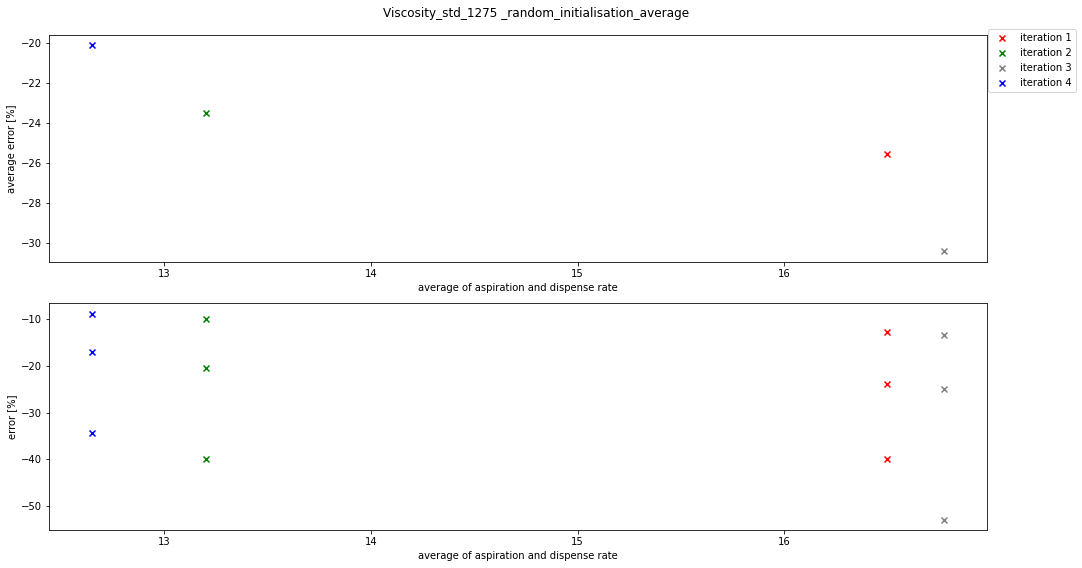

In [67]:
fig,axs = plt.subplots(2,1)

axs[0].scatter(((df_cal_rate1['aspiration_rate']+df_cal_rate1['dispense_rate'])/2)[1],df_cal_rate1['%error'].mean(), label = 'iteration 1',marker= 'x', c = 'red')
axs[0].scatter(((df_cal_rate2['aspiration_rate']+df_cal_rate2['dispense_rate'])/2)[4],df_cal_rate2['%error'].mean(), label = 'iteration 2',marker= 'x', c = 'green')
axs[0].scatter(((df_cal_rate3['aspiration_rate']+df_cal_rate3['dispense_rate'])/2)[7],df_cal_rate3['%error'].mean(), label = 'iteration 3',marker= 'x', c = 'grey')
axs[0].scatter(((df_cal_rate4['aspiration_rate']+df_cal_rate4['dispense_rate'])/2)[10],df_cal_rate4['%error'].mean(),label = 'iteration 4',marker= 'x', c = 'blue')

# axs[0].plot(((df_cal_rate1['aspiration_rate']+df_cal_rate1['dispense_rate'])/2)[1],df_cal_rate1['%error'].mean(), c = 'red')
# axs[0].plot(((df_cal_rate2['aspiration_rate']+df_cal_rate2['dispense_rate'])/2)[4],df_cal_rate2['%error'].mean(), c = 'green')
# axs[0].plot(((df_cal_rate3['aspiration_rate']+df_cal_rate3['dispense_rate'])/2)[7],df_cal_rate3['%error'].mean(), c = 'grey')
# axs[0].plot(((df_cal_rate4['aspiration_rate']+df_cal_rate4['dispense_rate'])/2)[10],df_cal_rate4['%error'].mean(), c = 'blue')

axs[0].set_xlabel('average of aspiration and dispense rate')
axs[0].set_ylabel('average error [%]')


axs[1].scatter(((df_cal_rate1['aspiration_rate']+df_cal_rate1['dispense_rate'])/2),df_cal_rate1['%error'], marker= 'x', c = 'red')
axs[1].scatter(((df_cal_rate2['aspiration_rate']+df_cal_rate2['dispense_rate'])/2),df_cal_rate2['%error'], marker= 'x', c = 'green')
axs[1].scatter(((df_cal_rate3['aspiration_rate']+df_cal_rate3['dispense_rate'])/2),df_cal_rate3['%error'], marker= 'x', c = 'grey')
axs[1].scatter(((df_cal_rate4['aspiration_rate']+df_cal_rate4['dispense_rate'])/2),df_cal_rate4['%error'], marker= 'x', c = 'blue')

axs[1].set_xlabel('average of aspiration and dispense rate')
axs[1].set_ylabel('error [%]')

fig.set_size_inches(15, 8)
fig.suptitle('Viscosity_std_'+std+' '+'_random_initialisation_average')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()

fig.savefig(initialisation_folder+r'/'+'Viscosity_std_'+std+'_average'+'.png')

In [10]:
df_cal_rate4

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,touch_tip_aspirate,touch_tip_dispense,density,time,mi,mf,m,%error,Transfer_Observation,Comment
10,Viscosity_std_3,p1000,1000.0,127.5,212.5,0.0,5.0,5.0,0.0,True,False,0.8181,27.428678,24.4911,25.3193,0.8282,1.234568,Within tolerance,NaN
11,Viscosity_std_3,p1000,500.0,127.5,212.5,0.0,5.0,5.0,0.0,True,False,0.8181,21.160907,25.3193,25.7300,0.4107,0.403374,Within tolerance,NaN
12,Viscosity_std_3,p1000,100.0,127.5,212.5,0.0,5.0,5.0,0.0,True,False,0.8181,16.173758,25.7300,25.8163,0.0863,5.488327,Excess aspiration,NaN


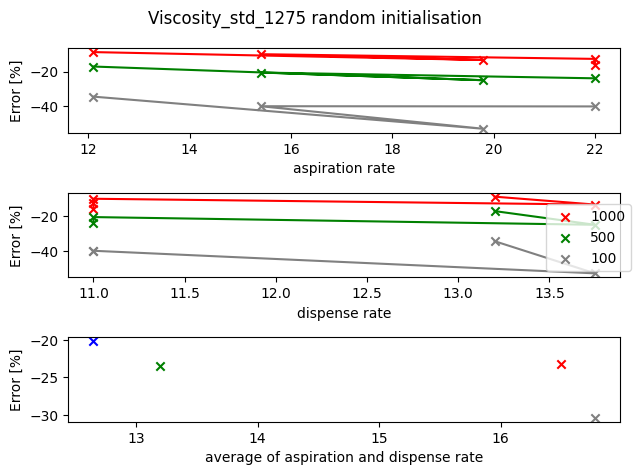

In [54]:
std = '1275'

initialisation_folder = ('/Users/Anne/Documents/Github/viscosity_liquid_transfer_Pablo/Opentrons_experiments/Random_initialisation_data_ver3')

df_cal = pd.read_csv('/Users/Anne/Documents/Github/viscosity_liquid_transfer_Pablo/Opentrons_experiments/Random_initialisation_data_ver3/Viscosity_std_'+std+'.csv')

ARs = df_cal['aspiration_rate'].unique()

fig,axs = plt.subplots(3,1)

df_cal_1000 = df_cal.where(df_cal.volume==1000).dropna(how='all')
df_cal_500 = df_cal.where(df_cal.volume==500).dropna(how='all')
df_cal_100 = df_cal.where(df_cal.volume==100).dropna(how='all')

#change the volumes accordingly
df_cal_rate1 = df_cal.where(df_cal.aspiration_rate==ARs[0]).dropna(how='all')
df_cal_rate2 = df_cal.where(df_cal.aspiration_rate==ARs[1]).dropna(how='all')
df_cal_rate3 = df_cal.where(df_cal.aspiration_rate==ARs[2]).dropna(how='all')
df_cal_rate4 = df_cal.where(df_cal.aspiration_rate==ARs[3]).dropna(how='all')

    
# for indv in ARs:
#     df_cal.where(df_cal.aspiration_rate==indv).mean(df_cal['%error'])
    

axs[0].scatter(df_cal_1000['aspiration_rate'],df_cal_1000['%error'], marker= 'x', label = '1000', c = 'red')
axs[0].scatter(df_cal_500['aspiration_rate'],df_cal_500['%error'], marker= 'x', label = '500', c = 'green')
axs[0].scatter(df_cal_100['aspiration_rate'],df_cal_100['%error'], marker= 'x', label = '100', c = 'grey')
#axs[0].scatter(df_cal_1000['aspiration_rate'],df_cal_1000['%error'], marker= 'x', label = '1000', c = 'red')

axs[0].plot(df_cal_1000['aspiration_rate'],df_cal_1000['%error'], c = 'red')
axs[0].plot(df_cal_500['aspiration_rate'],df_cal_500['%error'], c = 'green')
axs[0].plot(df_cal_100['aspiration_rate'],df_cal_100['%error'], c = 'grey')
#axs[0].plot(df_cal['aspiration_rate'],)

axs[0].set_xlabel('aspiration rate')
axs[0].set_ylabel('Error [%]')

axs[1].scatter(df_cal_1000['dispense_rate'],df_cal_1000['%error'], marker= 'x' , c = 'red')
axs[1].scatter(df_cal_500['dispense_rate'],df_cal_500['%error'], marker= 'x', c = 'green')
axs[1].scatter(df_cal_100['dispense_rate'],df_cal_100['%error'], marker= 'x', c = 'grey')

axs[1].plot(df_cal_1000['dispense_rate'],df_cal_1000['%error'], c = 'red')
axs[1].plot(df_cal_500['dispense_rate'],df_cal_500['%error'], c = 'green')
axs[1].plot(df_cal_100['dispense_rate'],df_cal_100['%error'], c = 'grey')

axs[1].set_xlabel('dispense rate')
axs[1].set_ylabel('Error [%]')


axs[2].scatter(((df_cal_rate1['aspiration_rate']+df_cal_rate1['dispense_rate'])/2)[1],df_cal_rate1['%error'].mean(), marker= 'x', c = 'red')
axs[2].scatter(((df_cal_rate2['aspiration_rate']+df_cal_rate2['dispense_rate'])/2)[4],df_cal_rate2['%error'].mean(), marker= 'x', c = 'green')
axs[2].scatter(((df_cal_rate3['aspiration_rate']+df_cal_rate3['dispense_rate'])/2)[7],df_cal_rate3['%error'].mean(), marker= 'x', c = 'grey')
axs[2].scatter(((df_cal_rate4['aspiration_rate']+df_cal_rate4['dispense_rate'])/2)[10],df_cal_rate4['%error'].mean(), marker= 'x', c = 'blue')

axs[2].plot(((df_cal_rate1['aspiration_rate']+df_cal_rate1['dispense_rate'])/2)[1],df_cal_rate1['%error'].mean(), c = 'red')
axs[2].plot(((df_cal_rate2['aspiration_rate']+df_cal_rate2['dispense_rate'])/2)[4],df_cal_rate2['%error'].mean(), c = 'green')
axs[2].plot(((df_cal_rate3['aspiration_rate']+df_cal_rate3['dispense_rate'])/2)[7],df_cal_rate3['%error'].mean(), c = 'grey')
axs[2].plot(((df_cal_rate4['aspiration_rate']+df_cal_rate4['dispense_rate'])/2)[10],df_cal_rate4['%error'].mean(), c = 'blue')

axs[2].set_xlabel('average of aspiration and dispense rate')
axs[2].set_ylabel('Error [%]')


fig.suptitle('Viscosity_std_'+std+' '+'random initialisation')
fig.legend(loc=7)
fig.tight_layout()
fig.savefig(initialisation_folder+r'/'+'Viscosity_std_'+std+'.png')


